29/29 [==============================] - 0s 8ms/step - loss: 2.7678e-05 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 3.3630
Epoch 1/20
109/109 [==============================] - 6s 29ms/step - loss: 1.2068e-05 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 5.2178 - val_loss: 8.9910e-08 - val_mean_absolute_error: 2.5314e-04 - val_mean_absolute_percentage_error: 0.3183
Epoch 2/20
109/109 [==============================] - 3s 23ms/step - loss: 1.3470e-06 - mean_absolute_error: 5.1515e-04 - mean_absolute_percentage_error: 1.8836 - val_loss: 5.2382e-08 - val_mean_absolute_error: 1.8370e-04 - val_mean_absolute_percentage_error: 0.2774
Epoch 3/20
109/109 [==============================] - 2s 22ms/step - loss: 9.8815e-07 - mean_absolute_error: 4.1474e-04 - mean_absolute_percentage_error: 1.5129 - val_loss: 5.0066e-08 - val_mean_absolute_error: 1.9119e-04 - val_mean_absolute_percentage_error: 0.2276
Epoch 4/20
109/109 [==============================] - 3s 23m

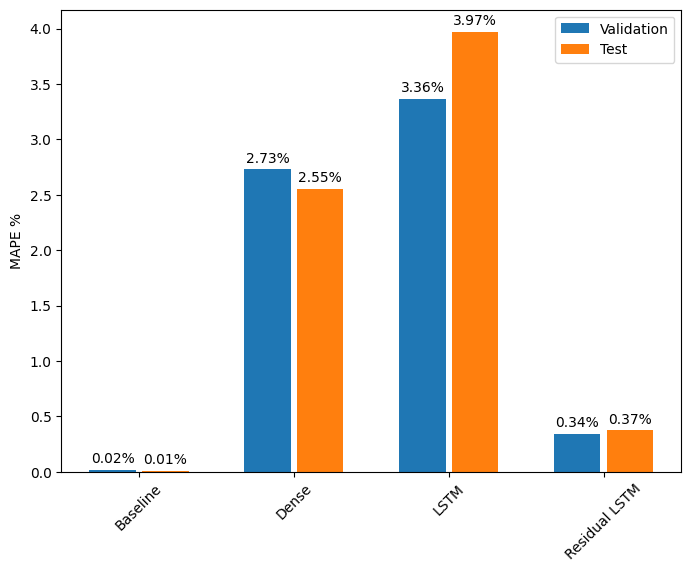

In [5]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

df= pd.read_csv('../training-datasets/output_1.csv')

time = pd.to_numeric(df.pop('time'))

plot_cols = ['theta', 'thetadot', 'x', 'xdot']
plot_features = df[plot_cols]

column_indices = {name: i for i, name in enumerate(df.columns)}

#splitting data by 70% training, 20% validating, 10% testing
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

#normalize data: subtract the mean and divide by the standard deviation of each feature.
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

#WindowGenerator used to modify/display training models
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                            enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                                enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
  
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

def plot(self, model=None, plot_col='theta', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plt.title(plot_col)
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
            
    plt.xlabel('Steps')
    
def plot_all(self, model=None):
        self.plot(model, plot_col='theta')
        self.plot(model, plot_col='thetadot')
        self.plot(model, plot_col='x')
        self.plot(model, plot_col='xdot')

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)
    return ds

@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.split_window = split_window
WindowGenerator.plot = plot
WindowGenerator.plot_all = plot_all
WindowGenerator.make_dataset = make_dataset
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=patience, 
                                                      mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(), 
                  optimizer=tf.keras.optimizers.Adam(), 
                  metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS, 
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

#define training window
window = WindowGenerator(input_width=100, label_width=100, shift=1)
val_performance = {}
performance = {}

class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError()])

val_performance['Baseline'] = baseline.evaluate(window.val)
performance['Baseline'] = baseline.evaluate(window.test, verbose=0)

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])
history = compile_and_fit(dense, window)

val_performance['Dense'] = dense.evaluate(window.val)
performance['Dense'] = dense.evaluate(window.test, verbose=0)
print()


lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( window.val)
performance['LSTM'] = lstm_model.evaluate( window.test, verbose=0)

class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)
    return inputs + delta

residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, window)

val_performance['Residual LSTM'] = residual_lstm.evaluate(window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(window.test, verbose=0)

print()

x = np.arange(len(performance))
width = 0.3

print('Loss, MAE, MAPE for all models')
for name, value in performance.items():
  print(f'{name:15s}: {value[0]:0.5e}, {value[1]:0.5f}, {value[2]:0.2f}%')

metric_name = 'mean_absolute_percentage_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_mape = [v[metric_index] for v in val_performance.values()]
test_mape = [v[metric_index] for v in performance.values()]

rects = plt.bar(x - 0.17, val_mape, width, label='Validation')
plt.bar_label(rects, fmt='{:.2f}%', padding=3)

rects = plt.bar(x + 0.17, test_mape, width, label='Test')
plt.bar_label(rects, fmt='{:.2f}%', padding=3)

plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAPE %')
_ = plt.legend()